<a href="https://colab.research.google.com/github/gayu-gith/PawNet-Real-Time-Cat-vs-Dog-Detector-using-YOLOv5-/blob/main/catvsdogdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Install Roboflow and YOLOv5
!pip install -q roboflow
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17511, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17511 (delta 5), reused 0 (delta 0), pack-reused 17491 (from 3)
Receiving objects: 100% (17511/17511), 16.60 MiB | 25.56 MiB/s, done.
Resolving deltas: 100% (11993/11993), done.
/content/yolov5/yolov5/yolov5/yolov5/yolov5
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)


In [22]:
import os
from google.colab import files

# Upload your kaggle.json
files.upload()  # ← Upload your kaggle.json when prompted

# Move kaggle.json to correct location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Oxford Pets dataset
!kaggle datasets download -d jessicali9530/oxford-pets-dataset
!unzip -q oxford-pets-dataset.zip -d oxford_pets

Saving kaggle.json to kaggle.json
403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/jessicali9530/oxford-pets-dataset
unzip:  cannot find or open oxford-pets-dataset.zip, oxford-pets-dataset.zip.zip or oxford-pets-dataset.zip.ZIP.


In [23]:
from roboflow import Roboflow

# Initialize Roboflow
rf = Roboflow(api_key="rDu07a3J7xVFKsSa5HLB")  # ← your Roboflow API key

# Download YOLOv5-compatible dataset
project = rf.workspace("julius-wuwung").project("cat-vs-dog-detection")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cat-vs-dog-detection-1 in yolov5pytorch:: 100%|██████████| 478/478 [00:00<00:00, 5740.47it/s]


In [30]:
# Move into the yolov5 folder (only once)
%cd yolov5

# Train the model
!python train.py --img 416 --batch 16 --epochs 10 --data {dataset.location}/data.yaml --weights yolov5s.pt --name pets_detector_10epochs

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5/yolov5/yolov5/yolov5/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-07-05 15:39:24.368771: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751729964.412189   12942 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751729964.423861   12942 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to log

In [36]:
!python detect.py --weights runs/train/pets_detector_10epochs/weights/best.pt --img 416 --source {dataset.location}/test/images

detect: weights=['runs/train/pets_detector_10epochs/weights/best.pt'], source=/content/yolov5/yolov5/yolov5/yolov5/yolov5/cat-vs-dog-detection-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 /content/yolov5/yolov5/yolov5/yolov5/yolov5/cat-vs-dog-detection-1/test/images/Cats_Test0_png.rf.601e753100f5930851936c8879693eae.jpg: 416x416 1 cat, 264.7ms
image 2/10 /content/yolov5/yolov5/yolov5/yolov5/yolov5/cat-vs-dog-detection-1/test/images/C

Saving Screenshot 2025-05-23 114901.png to Screenshot 2025-05-23 114901.png
detect: weights=['runs/train/pets_detector_10epochs/weights/best.pt'], source=input.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/yolov5/yolov5/yolov5/yolov5/input.jpg: 288x416 2 cats, 122.3ms
Speed: 0.8ms pre-process, 122.3ms inference, 1.5ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp13
1 labels saved to runs/detect/exp13/label

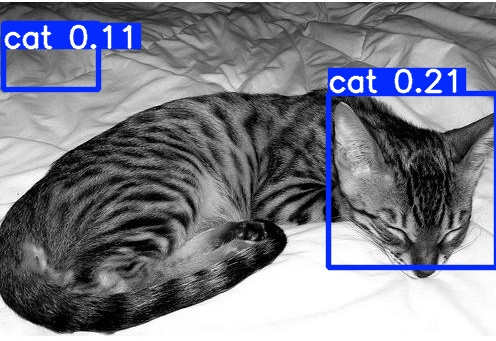

In [40]:
# ✅ Step 1: Upload your test image
from google.colab import files
import os
import shutil

uploaded = files.upload()
original_name = list(uploaded.keys())[0]

# ✅ Rename to avoid issues with spaces/characters
safe_name = "input.jpg"
shutil.move(original_name, safe_name)

# ✅ Step 2: Run YOLOv5 detection
!python detect.py \
  --weights runs/train/pets_detector_10epochs/weights/best.pt \
  --img 416 \
  --conf 0.1 \
  --source {safe_name} \
  --save-txt \
  --save-conf

# ✅ Step 3: Display the output image
from IPython.display import Image, display
import glob

# Find latest detection folder (exp, exp1, exp2...)
output_dirs = sorted(glob.glob('runs/detect/exp*'), key=os.path.getmtime)
latest_output = output_dirs[-1]

# Display the result image
output_image_path = os.path.join(latest_output, safe_name)
print("Output saved to:", output_image_path)
display(Image(filename=output_image_path))